In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Songti SC'

# 导入数据 查看基本信息
filename = '../002Data/original data.csv'
data = pd.read_csv(filename, encoding='utf-8')
data.info()
print('初始数据规模：', data.shape)
ds1 = data.shape[0]
ds2 = data.shape[1]

# 列名重命名
data.rename(columns={'resblock-tag1 resblock-tag_resblock-type_resblock-tag2_resblock-tag3': '标签'}, inplace=True)

# 重复项识别删除
data = data.drop_duplicates(subset=['标题', '地区', '位置', '具体位置', '类型', '均价/平方米每元', '室厅数', '面积', '标签', '总价'])
print('重复项：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
ds1 = data.shape[0]

# 选择子集 删除无用属性（具体位置）
data = data[['标题', '地区', '位置', '类型', '均价/平方米每元', '室厅数', '面积', '标签', '总价']]
print('删除无用属性：已删除列数', ds2-data.shape[1], '清洗后数据规模', data.shape)
ds2 = data.shape[1]


# 两端空格 识别处理
def check_space(s):
    if isinstance(s, str):
        has_space = s.startswith(' ') or s.endswith(' ')
        return has_space
    return False


rows_to_delete = []
columns_to_skip = ['标签', '室厅数', '面积']
for col in data.columns:
    if col in columns_to_skip:
        continue
    for index, value in data[col].items():
        has_space = check_space(value)
        if has_space:
            print(f"列名: {col}, 行索引: {index}, 值: {value}, 是否有空格: {has_space}")
            if index not in rows_to_delete:
                rows_to_delete.append(index)
data = data.drop(rows_to_delete)
print('两端空格：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
ds1 = data.shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   标题                                                                    1017 non-null   object
 1   地区                                                                    1017 non-null   object
 2   位置                                                                    1011 non-null   object
 3   具体位置                                                                  1017 non-null   object
 4   resblock-tag1 resblock-tag_resblock-type_resblock-tag2_resblock-tag3  1017 non-null   object
 5   均价/平方米每元                                                              1017 non-null   object
 6   总价                                                                    789 non-null    object
 7   类型    

In [2]:

# 特殊字符 识别处理
def check_specialchar(s):
    if isinstance(s, str):
        pattern = r'[@;?!@#$%^&*【】]'
        has_special_char = bool(re.search(pattern, s))
        return has_special_char
    return False


rows_to_delete = []
for col in data.columns:
    for index, value in data[col].items():
        has_special_char = check_specialchar(value)
        if has_special_char:
            print(f"列名: {col}, 行索引: {index}, 值: {value}, 是否有特殊字符: {has_special_char}")
            if index not in rows_to_delete:
                rows_to_delete.append(index)
data = data.drop(rows_to_delete)
print('特殊字符：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
ds1 = data.shape[0]



列名: 标题, 行索引: 510, 值: 保利珠江印象&保利珠江天悦, 是否有特殊字符: True
特殊字符：已删除行数 1 清洗后数据规模 (949, 9)


In [3]:
print(data)

             标题   地区    位置  类型 均价/平方米每元         室厅数           面积  \
0        保利南沙天汇   南沙    黄阁  在售    15000  2室, 3室, 4室   建面 78-135㎡   
1    保利招商华发中央公馆   黄埔  黄埔区府  在售    45000      2室, 3室   建面 81-159㎡   
2         中建海丝城   黄埔    文冲  在售    34000      3室, 4室   建面 78-117㎡   
3        中建·星光城   白云    石井  在售    26000      3室, 4室   建面 69-100㎡   
4       星河·盛世锦城   番禺   雅居乐  在售    37000      3室, 4室   建面 95-139㎡   
..          ...  ...   ...  ..      ...         ...          ...   
952      碧桂园翡翠郡   四会    大旺  售罄     5300      3室, 4室   建面 87-116㎡   
953      保利爱乐小镇  四会市  大旺广场  售罄     5800  2室, 3室, 4室   建面 71-143㎡   
954       龙光玖誉城  鼎湖区    鼎湖  售罄     9300  2室, 3室, 4室   建面 82-121㎡   
955     碧桂园明珠花园   四会    大旺  售罄     5500          3室    建面 87-98㎡   
956        恒大名都   四会    大旺  售罄     6400      3室, 4室  建面 108-132㎡   

                        标签              总价  
0    特价好房, 低单价, 车位充足, 绿化率高  总价125-330(万/套)  
1    绿化率高, 人车分流, 国央企, 品牌房企  总价410-520(万/套)  
2    绿化率高, 人车分流, 国央企, 品牌房企  总价250-410(万/套)  
3  

因变量缺失：已删除行数 221 清洗后数据规模 (728, 9)


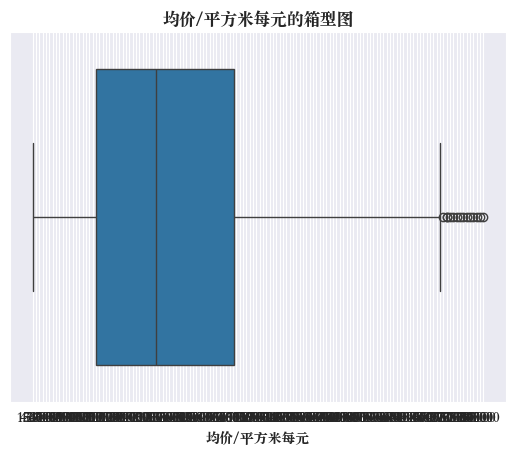

均价异常值：已删除行数 44 清洗后数据规模 (684, 9)


In [4]:
 # 删除没有因变量（总价）的数据
 data = data.dropna(subset=['总价'])
 print('因变量缺失：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
 ds1 = data.shape[0]

 # 异常值（每平方均价与常识不符）
 sns.boxplot(x=data['均价/平方米每元'])
 plt.title('均价/平方米每元的箱型图')
 plt.xlabel('均价/平方米每元')
 plt.show()
 data['均价/平方米每元'] = pd.to_numeric(data['均价/平方米每元'], errors='coerce')
 data = data.dropna(subset=['均价/平方米每元'])
 q1 = data['均价/平方米每元'].quantile(0.25)
 q3 = data['均价/平方米每元'].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outlier_index = data[(data['均价/平方米每元'] < lower_bound) | (data['均价/平方米每元'] > upper_bound)].index
 data = data.drop(outlier_index)
 print('均价异常值：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
 ds1 = data.shape[0]

In [5]:
# 缺失值识别
data.info()

# 位置 不填充直接删除
data = data.dropna(subset=['位置'])
print('位置空缺值：已删除行数', ds1-data.shape[0], '清洗后数据规模', data.shape)
print(data)

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 956
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   标题        684 non-null    object
 1   地区        684 non-null    object
 2   位置        680 non-null    object
 3   类型        684 non-null    object
 4   均价/平方米每元  684 non-null    int64 
 5   室厅数       619 non-null    object
 6   面积        633 non-null    object
 7   标签        684 non-null    object
 8   总价        684 non-null    object
dtypes: int64(1), object(8)
memory usage: 53.4+ KB
位置空缺值：已删除行数 4 清洗后数据规模 (680, 9)
             标题   地区    位置  类型  均价/平方米每元         室厅数           面积  \
0        保利南沙天汇   南沙    黄阁  在售     15000  2室, 3室, 4室   建面 78-135㎡   
1    保利招商华发中央公馆   黄埔  黄埔区府  在售     45000      2室, 3室   建面 81-159㎡   
2         中建海丝城   黄埔    文冲  在售     34000      3室, 4室   建面 78-117㎡   
3        中建·星光城   白云    石井  在售     26000      3室, 4室   建面 69-100㎡   
4       星河·盛世锦城   番禺   雅居乐  在售     37000      3室, 4室   建

In [6]:
ds1 = data.shape[0]

# print('室厅数空缺值：', data['室厅数'].isnull().sum())
# print(data['室厅数'])
print(data)

             标题   地区    位置  类型  均价/平方米每元         室厅数           面积  \
0        保利南沙天汇   南沙    黄阁  在售     15000  2室, 3室, 4室   建面 78-135㎡   
1    保利招商华发中央公馆   黄埔  黄埔区府  在售     45000      2室, 3室   建面 81-159㎡   
2         中建海丝城   黄埔    文冲  在售     34000      3室, 4室   建面 78-117㎡   
3        中建·星光城   白云    石井  在售     26000      3室, 4室   建面 69-100㎡   
4       星河·盛世锦城   番禺   雅居乐  在售     37000      3室, 4室   建面 95-139㎡   
..          ...  ...   ...  ..       ...         ...          ...   
951      龙光·玖龙湖   四会    大旺  售罄      6500      2室, 3室    建面 39-78㎡   
953      保利爱乐小镇  四会市  大旺广场  售罄      5800  2室, 3室, 4室   建面 71-143㎡   
954       龙光玖誉城  鼎湖区    鼎湖  售罄      9300  2室, 3室, 4室   建面 82-121㎡   
955     碧桂园明珠花园   四会    大旺  售罄      5500          3室    建面 87-98㎡   
956        恒大名都   四会    大旺  售罄      6400      3室, 4室  建面 108-132㎡   

                        标签              总价  
0    特价好房, 低单价, 车位充足, 绿化率高  总价125-330(万/套)  
1    绿化率高, 人车分流, 国央企, 品牌房企  总价410-520(万/套)  
2    绿化率高, 人车分流, 国央企, 品牌房企  总价250-41

In [7]:
# 室厅数 众数填充

mode_value = data['室厅数'].mode()[0]
data['室厅数'].fillna(mode_value, inplace=True)
missing_count = data['室厅数'].isnull().sum()
print('室厅数空缺值（填充后）：', data['室厅数'].isnull().sum())

室厅数空缺值（填充后）： 0
